# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [ ]:
X, y, c = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 0.8, return_centers = True)

In [ ]:
df_blobs = pd.DataFrame(
    {
        "x1" : X[:,0],
        "x2" : X[:,1],
        "y" : y,
    }
)

In [ ]:
df_blobs.head()

,x1,x2,y
0,-3.669703,-1.516352,3
1,-0.738494,-6.251679,1
2,2.057936,-1.256509,0
3,3.022282,-1.634142,0
4,1.664769,-1.459654,0


In [ ]:
df_centers = pd.DataFrame(
    {
        "x1" : c[:,0],
        "x2" : c[:,1]
    }
)

## Visualización de datos

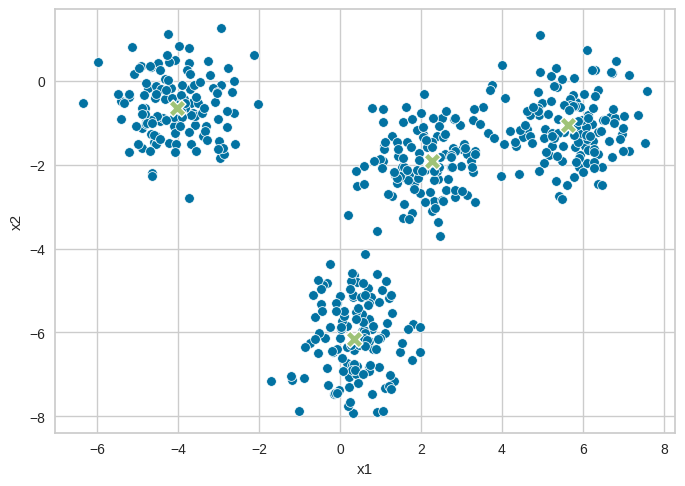

In [ ]:
sns.scatterplot(data = df_blobs, x = "x1", y = "x2")
sns.scatterplot(data = df_centers, x = "x1", y = "x2", marker = "X", s = 150)
plt.show()

## Aplicando K-means

In [ ]:
kmeans = KMeans(n_clusters = 4)
df_cluster = kmeans.fit_predict(X)
df_blobs["Cluster"] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_centers = pd.DataFrame(
    {
        "x1" : k_means_centers[:,0],
        "x2" : k_means_centers[:,1],
    }
)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='x1', ylabel='x2'>

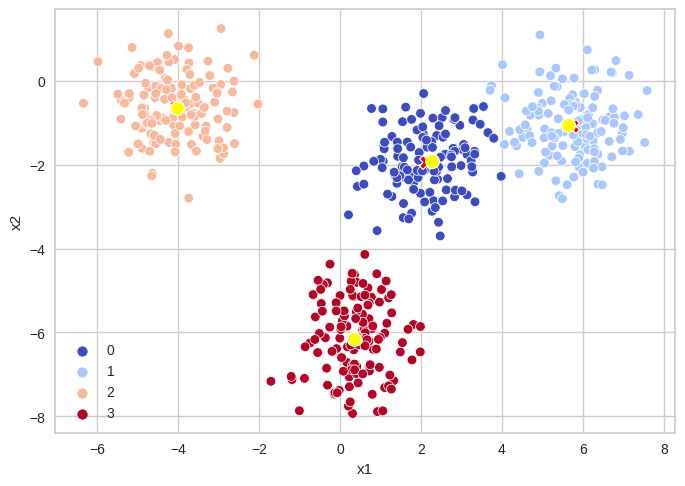

In [ ]:
sns.scatterplot(data = df_blobs, x = "x1", y = "x2", hue = "Cluster", palette = "coolwarm")
sns.scatterplot(data = df_k_means_centers, x = "x1", y = "x2", marker = "X", color = "red", s = 100 )
sns.scatterplot(data = df_centers, x = "x1", y = "x2", marker = "o", color = "yellow", s = 100 )

In [ ]:
def vis_cluster(k):
  kmeans = KMeans(n_clusters = k)
  df_cluster = kmeans.fit_predict(X)
  df_blobs["Cluster"] = df_cluster
  k_means_centers = kmeans.cluster_centers_
  df_k_means_centers = pd.DataFrame(
      {
          "x1" : k_means_centers[:,0],
          "x2" : k_means_centers[:,1],
      }
  )
  sns.scatterplot(data = df_blobs, x = "x1", y = "x2", hue = "Cluster", palette = "coolwarm")
  sns.scatterplot(data = df_k_means_centers, x = "x1", y = "x2", marker = "X", color = "red", s = 100 )
  sns.scatterplot(data = df_centers, x = "x1", y = "x2", marker = "o", color = "yellow", s = 100 )
  plt.show()

2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


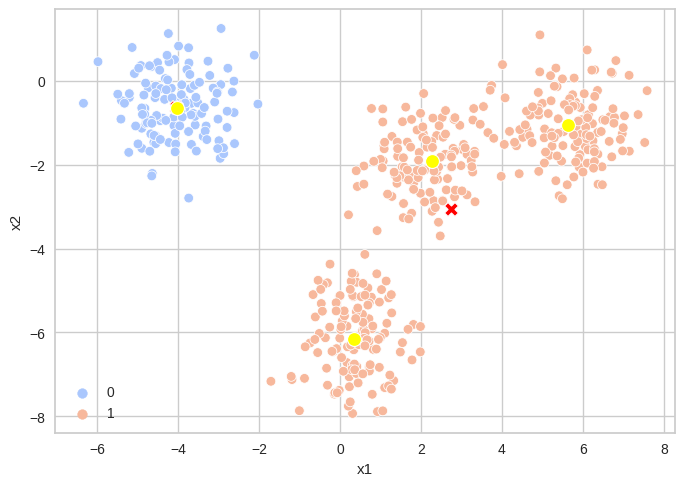

3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


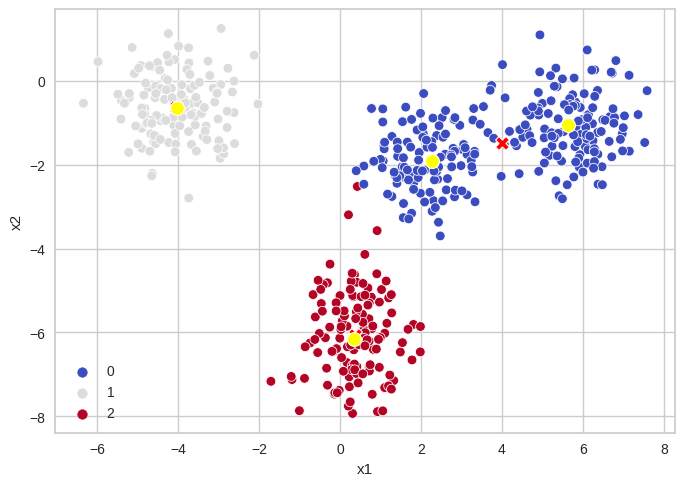

4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


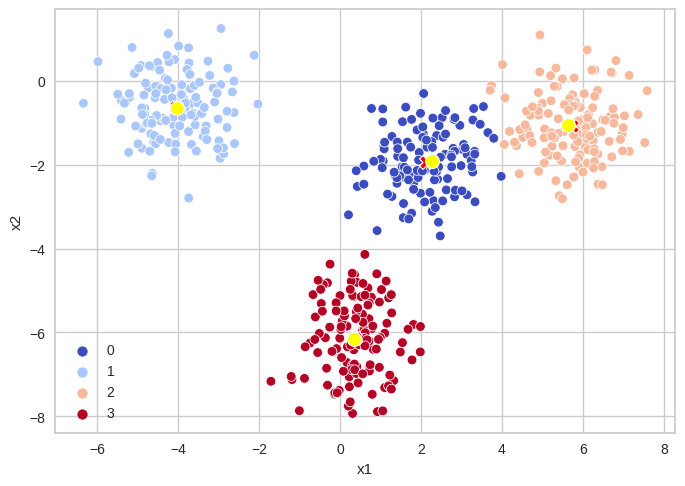

5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


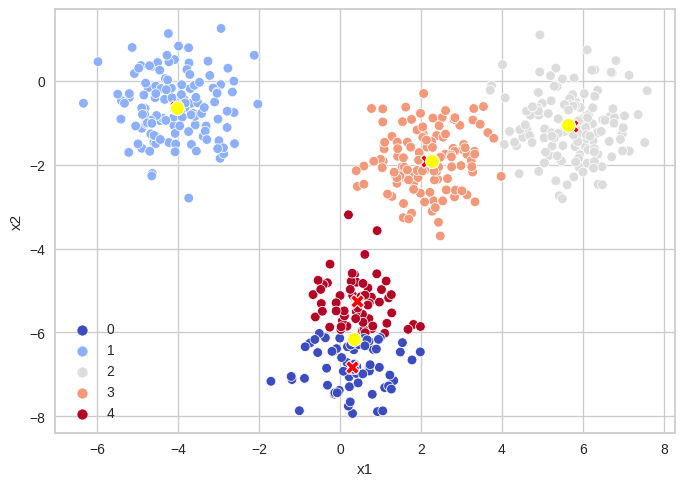

6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


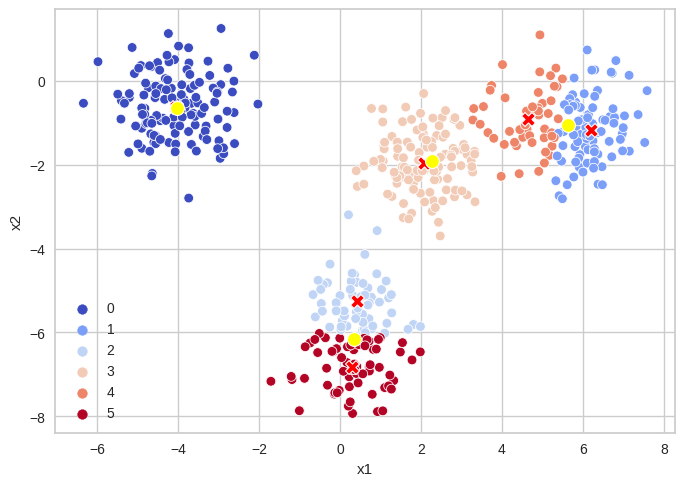

In [ ]:
for _ in range(2,7):
  print(_)
  vis_cluster(_)


## Encontrando el valor de K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

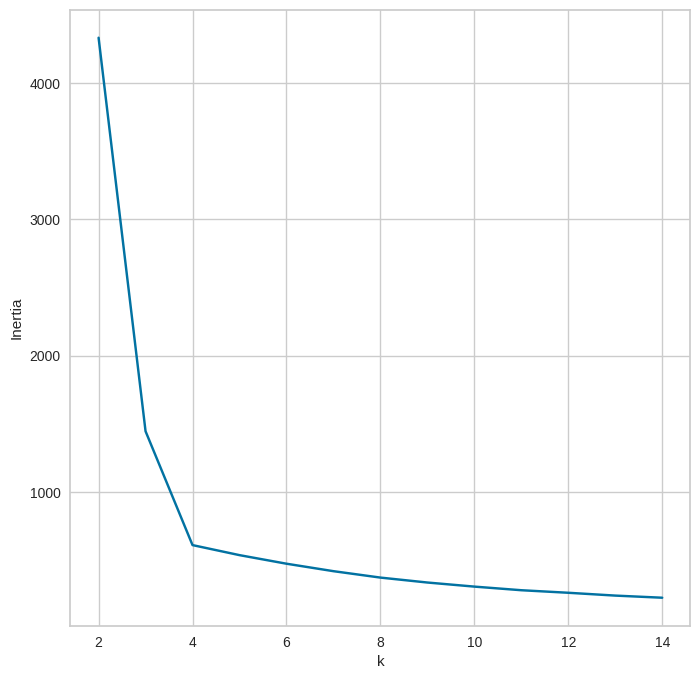

In [ ]:
sum_of_squared_distances = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(X)
  sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize = (8,8))
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

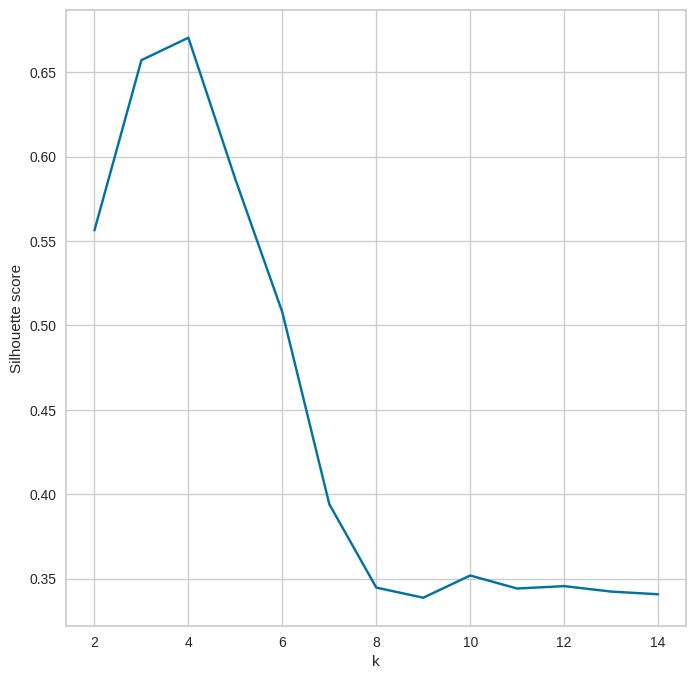

In [ ]:
silhouette_scores = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(X)
  y = km.predict(X)
  silhouette_scores.append(silhouette_score(X,y))

plt.figure(figsize = (8,8))
plt.plot(K, silhouette_scores, "bx-")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.show()

## Evaluando clusters con K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

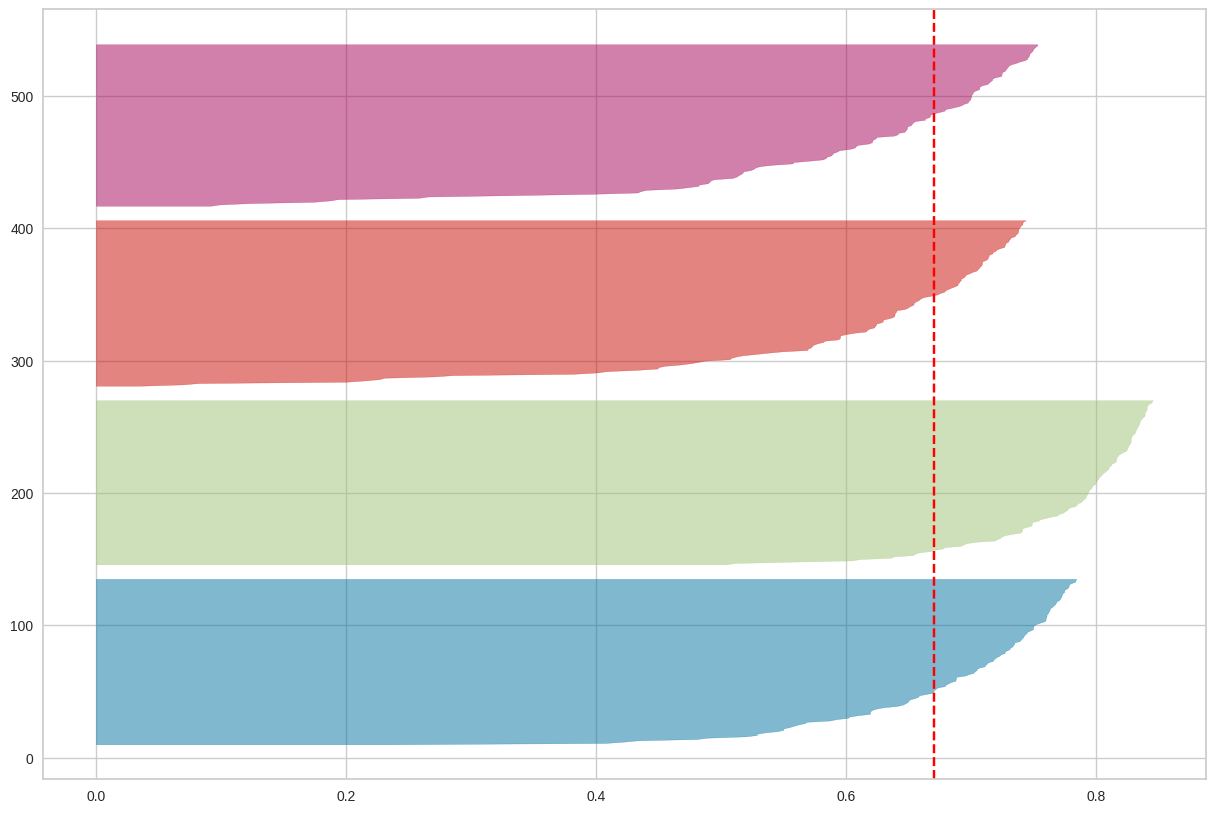

In [ ]:
plt.figure( figsize = (15,10))
km = KMeans(n_clusters = 4)
visualizer = SilhouetteVisualizer(km, colors = "yellowbrick")
visualizer.fit(X)